In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
sns.set(font_scale=2.5)
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
df=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df.shape

(768, 9)

# 1. Null data & Outlier Check

In [3]:
for col in df.columns:
    msg=f'Columns: {col:>10}\t Percentage of NAN value: {100*(df[col].isnull()).sum() / df[col].shape[0]:.2f}%'
    print(msg)

Columns: Pregnancies	 Percentage of NAN value: 0.00%
Columns:    Glucose	 Percentage of NAN value: 0.00%
Columns: BloodPressure	 Percentage of NAN value: 0.00%
Columns: SkinThickness	 Percentage of NAN value: 0.00%
Columns:    Insulin	 Percentage of NAN value: 0.00%
Columns:        BMI	 Percentage of NAN value: 0.00%
Columns: DiabetesPedigreeFunction	 Percentage of NAN value: 0.00%
Columns:        Age	 Percentage of NAN value: 0.00%
Columns:    Outcome	 Percentage of NAN value: 0.00%


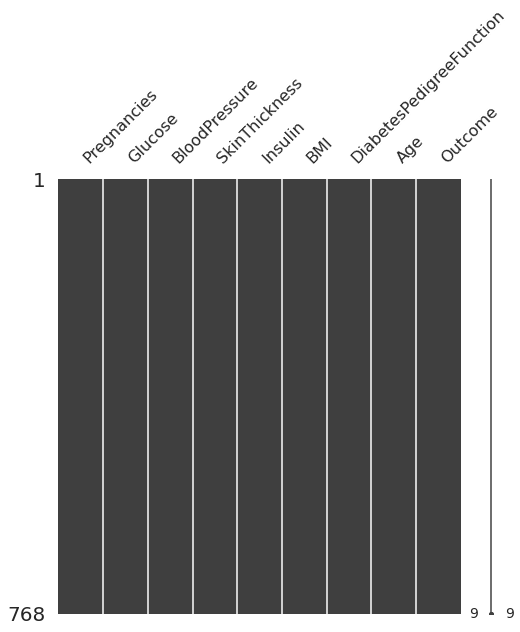

In [4]:
msno.matrix(df=df, figsize=(8,8))

In [7]:
display(df.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text major ticklabel objects>)

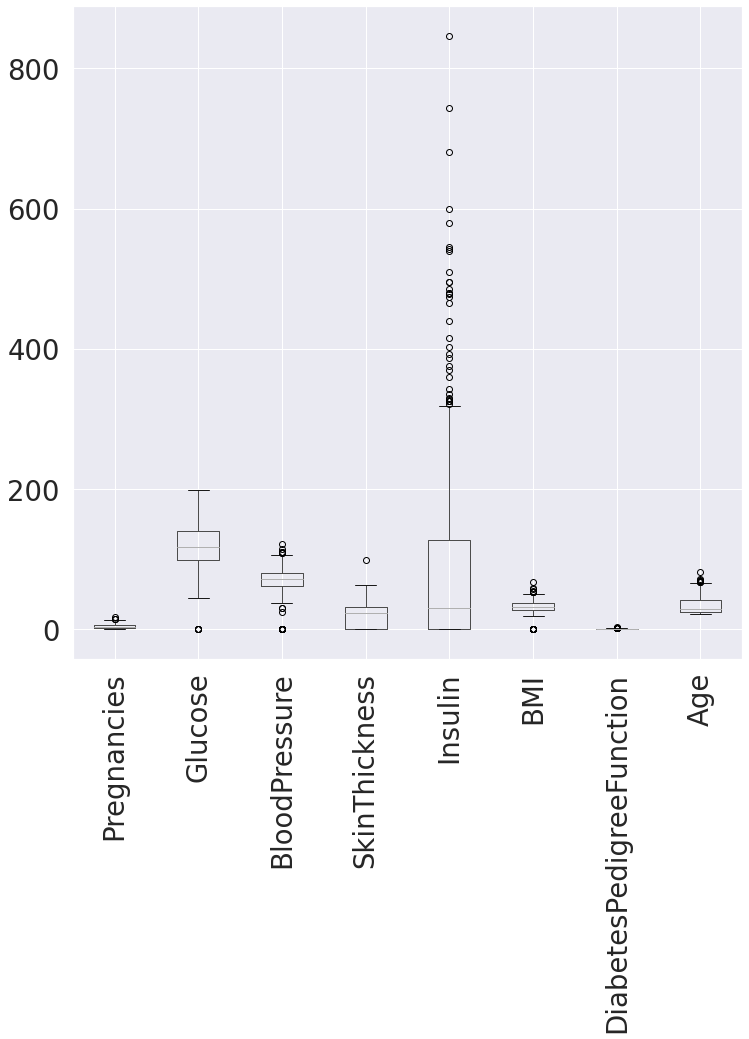

In [20]:
plt.figure(figsize=(12,12))
df.iloc[:,:-1].boxplot()
plt.xticks(rotation=90)

In [26]:
df_null = df.iloc[:,1:-1].replace(0,np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

<BarContainer object of 136 artists>

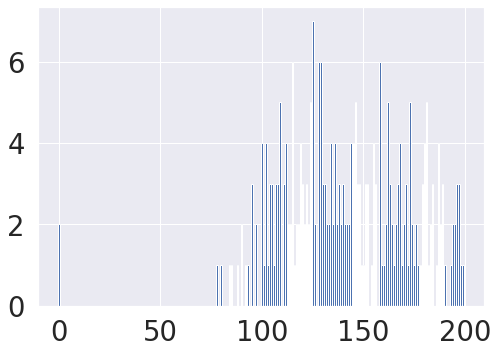

In [41]:
df_Glucose=df[['Glucose','Outcome']].groupby(['Glucose'],as_index=True).sum()
plt.figure(figsize=(12,12))
plt.bar(df_Glucose.index,df_Glucose['Outcome'])

In [22]:
df.iloc[:,:-1].corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000
